# Machine learning model.

Can we predict real estate prices based on features?

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv("teste_data.csv")
display(df)

,URL,Type,Subtype,Price,Bedroom,Living_area,Listing_address,Postal_code,Locality,District,...,Kitchen,Facade,Open Fire,Furnished,State of the building,zip,city,lng,lat,Province
0,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,169000.0,2.0,88.0,Torhoutsesteenweg 336,8400.0,Oostende,Oostend,...,not_available,2.0,False,False,TO_BE_DONE_UP,8400,Oostende,2.920327,51.230318,West-Vlaanderen
1,https://www.immoweb.be/en/classified/house/for...,house,house,219000.0,3.0,163.0,Edith Cavellstraat 28,8400.0,Oostende,Oostend,...,not_available,2.0,False,False,TO_RENOVATE,8400,Oostende,2.920327,51.230318,West-Vlaanderen
2,https://www.immoweb.be/en/classified/house/for...,house,house,299000.0,4.0,154.0,Duivenhokstraat 118,8400.0,Oostende,Oostend,...,installed,NaN,False,False,JUST_RENOVATED,8400,Oostende,2.920327,51.230318,West-Vlaanderen
3,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,169000.0,1.0,62.0,Karel Janssenslaan 49,8400.0,Oostende,Oostend,...,not_available,NaN,False,False,not_available,8400,Oostende,2.920327,51.230318,West-Vlaanderen
4,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,169000.0,1.0,62.0,Karel Janssenslaan 49,8400.0,Oostende,Oostend,...,not_available,NaN,False,False,not_available,8400,Oostende,2.920327,51.230318,West-Vlaanderen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711,https://www.immoweb.be/en/classified/house/for...,house,house,300000.0,4.0,120.0,"Am Schlossberg, Ouren 85",4790.0,Burg-Reuland,Verviers,...,installed,3.0,False,False,GOOD,4790,Burg-Reuland,6.121679,50.174781,Luik
9712,https://www.immoweb.be/en/classified/house/for...,house,house,349000.0,4.0,272.0,Rue des Aulnais 1-3,5576.0,Froidfontaine,Dinant,...,not_available,4.0,False,False,GOOD,5576,Froidfontaine,5.000634,50.060403,Namen
9713,https://www.immoweb.be/en/classified/house/for...,house,house,265000.0,2.0,147.0,Lange Blok 50,2431.0,Veerle,Turnhout,...,installed,4.0,False,False,TO_BE_DONE_UP,2431,Varendonk,4.955225,51.080132,Antwerpen
9714,https://www.immoweb.be/en/classified/house/for...,house,house,499000.0,6.0,235.0,Rue Amry 19,4682.0,Oupeye Heure-le-Romain,Liège,...,hyper equipped,4.0,False,False,AS_NEW,4682,Heure-Le-Romain,5.629555,50.731697,Luik


### As we've learned in our previous analysis, living area has the highest correlation with price.

Let's plot those 2 variables against one another and see what that correlation looks like.

[Text(0.5, 1.0, 'Price vs Living area'),
 Text(0.5, 0, 'Living Area'),
 Text(0, 0.5, 'Price')]

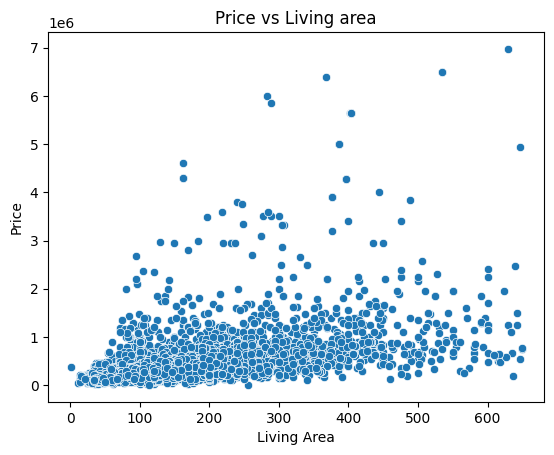

In [5]:
#Remove outliers
std = df.select_dtypes('float').std()
distance = abs(df.select_dtypes('float')-df.select_dtypes('float').mean()).div(std)
living_outliers = distance.loc[distance["Living_area"] > 3, "Living_area"]
df = df[~df.index.isin(living_outliers.index)]

plot = sns.scatterplot(data=df, x="Living_area", y="Price")
plot.set(title="Price vs Living area",xlabel="Living Area", ylabel="Price")

### Feels like maybe if we can filter it through some other variables, the living area would be more meaningful. Let's take a look at the same graph by now filtered by some categorical data.

First let's filter by type.

[Text(0.5, 1.0, 'Price vs Living area separated by Type'),
 Text(0.5, 0, 'Living Area'),
 Text(0, 0.5, 'Price')]

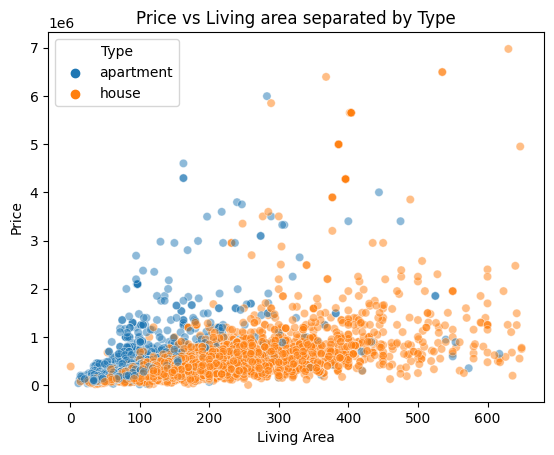

In [8]:
plot = sns.scatterplot(data=df, x="Living_area", y="Price", hue="Type", alpha=0.5)
plot.set(title="Price vs Living area separated by Type",xlabel="Living Area", ylabel="Price")

### It seems to behave different, let's see other variables

Let's take a look at province

[Text(0.5, 1.0, 'Average listing price per Province')]

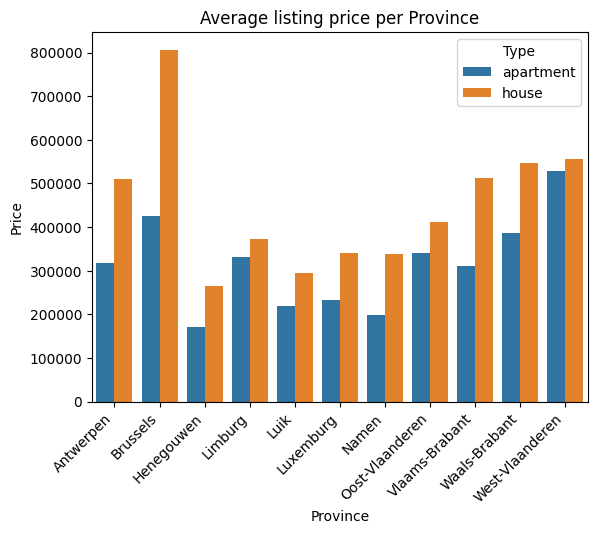

In [9]:
plot = sns.barplot(data=df.loc[:,["Price", "Province", "Type"]].groupby(["Province", "Type"], as_index=False).mean(), x="Province", y="Price", hue="Type")
plot.set_xticklabels(plot.get_xticklabels(),rotation=45, horizontalalignment='right')
plot.set(title="Average listing price per Province")

### Once again, feels like filtering by this kind of information will be meaningful.

Let's turn those 2 variables (Type and Province into numeric variables)

In [21]:
df_dummies = pd.get_dummies(df[["Type", "Province"]])
display(df_dummies)
df_regression = pd.concat([df[["Price", "Living_area"]], df_dummies], axis=1)
display(df_regression)

,Type_apartment,Type_house,Province_Antwerpen,Province_Brussels,Province_Henegouwen,Province_Limburg,Province_Luik,Province_Luxemburg,Province_Namen,Province_Oost-Vlaanderen,Province_Vlaams-Brabant,Province_Waals-Brabant,Province_West-Vlaanderen
0,True,False,False,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711,False,True,False,False,False,False,True,False,False,False,False,False,False
9712,False,True,False,False,False,False,False,False,True,False,False,False,False
9713,False,True,True,False,False,False,False,False,False,False,False,False,False
9714,False,True,False,False,False,False,True,False,False,False,False,False,False


,Price,Living_area,Type_apartment,Type_house,Province_Antwerpen,Province_Brussels,Province_Henegouwen,Province_Limburg,Province_Luik,Province_Luxemburg,Province_Namen,Province_Oost-Vlaanderen,Province_Vlaams-Brabant,Province_Waals-Brabant,Province_West-Vlaanderen
0,169000.0,88.0,True,False,False,False,False,False,False,False,False,False,False,False,True
1,219000.0,163.0,False,True,False,False,False,False,False,False,False,False,False,False,True
2,299000.0,154.0,False,True,False,False,False,False,False,False,False,False,False,False,True
3,169000.0,62.0,True,False,False,False,False,False,False,False,False,False,False,False,True
4,169000.0,62.0,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711,300000.0,120.0,False,True,False,False,False,False,True,False,False,False,False,False,False
9712,349000.0,272.0,False,True,False,False,False,False,False,False,True,False,False,False,False
9713,265000.0,147.0,False,True,True,False,False,False,False,False,False,False,False,False,False
9714,499000.0,235.0,False,True,False,False,False,False,True,False,False,False,False,False,False


### Now let's start our model!



In [25]:
X = df_regression[["Living_area", "Type_apartment", "Province_Antwerpen", "Province_Brussels", "Province_Henegouwen", "Province_Limburg", "Province_Luik", "Province_Luxemburg", "Province_Namen", "Province_Oost-Vlaanderen", "Province_Vlaams-Brabant", "Province_Waals-Brabant"]].to_numpy()
y = df_regression["Price"].to_numpy()
